In [2]:
import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"

mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"
%matplotlib inline

In [3]:
import pandas as pd
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from calibration_dataset import Tell1Dataset

class MyDS(Tell1Dataset):
    filename_format = '%Y-%m-%d'
    filename_regex_format = r'\d{4}-\d{2}-\d{2}.csv'

datapath = "../data/calibrations/"
data_list = MyDS.get_filepaths_from_dir(datapath)
mds = MyDS(data_list, read=True)




100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  4.00it/s]


In [72]:
data = {'hit threshold':mds.dfh.df,'pedestal' : mds.dfp.df,'low threshold': mds.dfl.df}

{'hit threshold':                type  sensor   datetime  Zmod slot_label  mod_nr  mod_type  \
 2     hit_threshold     0.0 2010-08-16  -175      VL01L   mod_0  VELO_phi   
 5     hit_threshold     0.0 2010-08-18  -175      VL01L   mod_0  VELO_phi   
 8     hit_threshold     0.0 2011-03-07  -175      VL01L   mod_0  VELO_phi   
 11    hit_threshold     0.0 2011-05-01  -175      VL01L   mod_0  VELO_phi   
 14    hit_threshold     0.0 2011-06-18  -175      VL01L   mod_0  VELO_phi   
 ...             ...     ...        ...   ...        ...     ...       ...   
 7547  hit_threshold   105.0 2016-11-07   750      VL25R  mod_41   VELO_Rx   
 7550  hit_threshold   105.0 2016-11-11   750      VL25R  mod_41   VELO_Rx   
 7553  hit_threshold   105.0 2017-05-21   750      VL25R  mod_41   VELO_Rx   
 7556  hit_threshold   105.0 2017-06-21   750      VL25R  mod_41   VELO_Rx   
 7559  hit_threshold   105.0 2017-07-18   750      VL25R  mod_41   VELO_Rx   
 
      sensor_type sensor_number  channel0  ..

In [90]:
for key in data:
    data[key] = data[key].drop(['Zmod','slot_label','mod_nr','sensor_number','type','datetime'],axis=1)
    data[key] = {'phi':data[key][(data[key]['mod_type'] =='VELO_phi') & (data[key]['sensor_type'] == 'phi')],\
                    'r_phi':data[key][(data[key]['mod_type'] =='VELO_phi') & (data[key]['sensor_type'] == 'R')],\
                 'r_RX':data[key][(data[key]['mod_type'] =='VELO_Rx')]}
    for typ in data[key]:
        data[key][typ] = data[key][typ].drop(['mod_type','sensor_type'],axis=1)

,sensor,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,...,channel2038,channel2039,channel2040,channel2041,channel2042,channel2043,channel2044,channel2045,channel2046,channel2047
6842,98.0,10.0,11.0,10.0,11.0,10.0,11.0,10.0,11.0,10.0,...,10.0,11.0,9.0,11.0,10.0,12.0,10.0,12.0,11.0,11.0
6845,98.0,10.0,11.0,10.0,11.0,11.0,10.0,10.0,11.0,10.0,...,10.0,11.0,10.0,12.0,10.0,11.0,10.0,11.0,11.0,11.0
6848,98.0,10.0,11.0,10.0,11.0,10.0,11.0,10.0,10.0,10.0,...,10.0,11.0,10.0,11.0,10.0,11.0,10.0,11.0,11.0,11.0
6851,98.0,10.0,11.0,10.0,11.0,11.0,10.0,10.0,10.0,10.0,...,9.0,11.0,9.0,11.0,9.0,11.0,10.0,11.0,11.0,11.0
6854,98.0,10.0,10.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,...,9.0,12.0,9.0,11.0,9.0,11.0,9.0,11.0,10.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,105.0,10.0,11.0,11.0,11.0,11.0,11.0,10.0,11.0,10.0,...,10.0,9.0,10.0,12.0,10.0,12.0,10.0,12.0,10.0,12.0
7550,105.0,9.0,11.0,11.0,11.0,11.0,11.0,10.0,11.0,11.0,...,11.0,9.0,10.0,12.0,11.0,12.0,10.0,12.0,10.0,12.0
7553,105.0,9.0,11.0,11.0,11.0,11.0,11.0,10.0,11.0,11.0,...,10.0,10.0,10.0,12.0,11.0,12.0,10.0,12.0,10.0,12.0
7556,105.0,10.0,11.0,11.0,11.0,10.0,11.0,11.0,11.0,11.0,...,11.0,9.0,10.0,12.0,10.0,12.0,10.0,12.0,10.0,12.0


In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [127]:
def full_pca(data,percent):
    data = StandardScaler().fit_transform(data)
    data_transponsed = data.transpose()
    pca = PCA(n_components = percent,svd_solver = 'auto')
    result = pca.fit_transform(data_transponsed)
    column_names = [f"Principal component {x+1}" for x in range(len(result[0]))]
    row_names = [f"Channel {x}" for x in range(len(result))]
    return pd.DataFrame(result,columns = column_names,index = row_names)

In [112]:
procentage_or_num_of_comp = 2


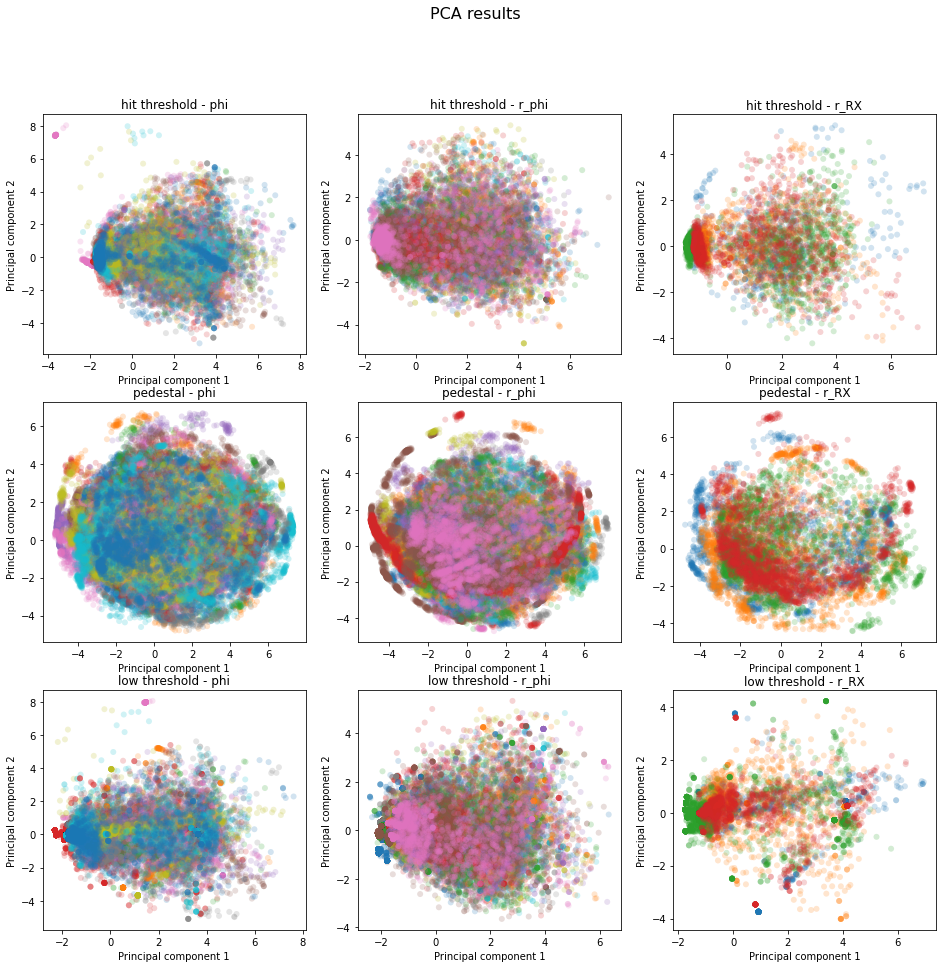

In [133]:
position = 331
plt.suptitle("PCA results",fontsize=16)
for mod_key in data:
    for sensor_key in data[mod_key]:
        single_data = data[mod_key][sensor_key]
        single_data = {k: v.drop('sensor',axis=1) for k, v in single_data.groupby('sensor')}
        plt.subplot(position, title=f'{mod_key} - {sensor_key}')
        for sensor_data in single_data:
            dataset = single_data[sensor_data]
            dataset_after_pca = full_pca(dataset,procentage_or_num_of_comp)
            plt.scatter(dataset_after_pca.iloc[:,0], dataset_after_pca.iloc[:,1], edgecolor='none', alpha=0.2)
        plt.xlabel('Principal component 1')
        plt.ylabel('Principal component 2')
        position+=1